In [244]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [245]:
df = pd.read_csv('dataset/preprocessed.csv')
df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_encoded,education_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,native-country_encoded,income_encoded
0,39.0,77516,13,2174.0,1872.178505,40,5,9,4,0,1,4,1,37,0
1,50.0,83311,13,7298.0,1872.178505,13,4,9,2,3,0,4,1,37,0
2,38.0,215646,9,7298.0,1872.178505,40,2,11,0,5,1,4,1,37,0
3,53.0,234721,7,7298.0,1872.178505,40,2,1,2,5,0,2,1,37,0
4,28.0,338409,13,7298.0,1872.178505,40,2,9,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44453,33.0,245211,13,7298.0,1872.178505,40,2,9,4,9,3,4,1,37,0
44454,39.0,215419,13,7298.0,1872.178505,36,2,9,0,9,1,4,0,37,0
44455,38.0,374983,13,7298.0,1872.178505,50,2,9,2,9,0,4,1,37,0
44456,44.0,83891,13,5455.0,1872.178505,40,2,9,0,0,3,1,1,37,0


In [246]:
# Split data into features and target 
x = df.drop('income_encoded', axis=1)
y = df['income_encoded']

In [247]:
x

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_encoded,education_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,native-country_encoded
0,39.0,77516,13,2174.0,1872.178505,40,5,9,4,0,1,4,1,37
1,50.0,83311,13,7298.0,1872.178505,13,4,9,2,3,0,4,1,37
2,38.0,215646,9,7298.0,1872.178505,40,2,11,0,5,1,4,1,37
3,53.0,234721,7,7298.0,1872.178505,40,2,1,2,5,0,2,1,37
4,28.0,338409,13,7298.0,1872.178505,40,2,9,2,9,5,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44453,33.0,245211,13,7298.0,1872.178505,40,2,9,4,9,3,4,1,37
44454,39.0,215419,13,7298.0,1872.178505,36,2,9,0,9,1,4,0,37
44455,38.0,374983,13,7298.0,1872.178505,50,2,9,2,9,0,4,1,37
44456,44.0,83891,13,5455.0,1872.178505,40,2,9,0,0,3,1,1,37


In [248]:
y

0        0
1        0
2        0
3        0
4        0
        ..
44453    0
44454    0
44455    0
44456    0
44457    1
Name: income_encoded, Length: 44458, dtype: int64

In [249]:
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [250]:
len(x_train), len(x_test), len(y_train), len(y_test)

(35566, 8892, 35566, 8892)

# Train Random Forest

In [251]:
rf = RandomForestClassifier()

In [252]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [253]:
y_predict = rf.predict(x_test)

In [254]:
rf_accuracy = accuracy_score(y_test, y_predict)
rf_accuracy

0.845591542959964

In [255]:
rf.score(x_test,y_test)

0.845591542959964

In [256]:
rf.score(x_train,y_train)

0.9999156497778777

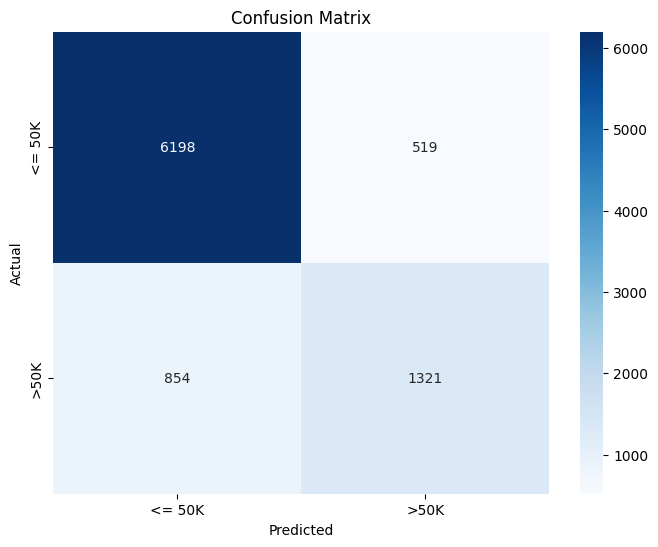

In [257]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<= 50K', '>50K'], yticklabels=['<= 50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Hyper parameter tuning for Random Forest Classifier

In [258]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt']  # Change 'auto' to 'sqrt'
}


# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search.fit(x_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(x_train, y_train)

# Evaluate the model
accuracy_test = best_rf.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy_test)

accuracy_train = best_rf.score(x_train, y_train)
print("Accuracy on Training Set:", accuracy_train)


Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 300}
Accuracy on Test Set: 0.8585245164192533
Accuracy on Training Set: 0.9482651970983523


In [259]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],  # Adjust max_depth to control overfitting
    'max_features': ['sqrt']
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, error_score='raise')
grid_search.fit(x_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(x_train, y_train)

# Evaluate the model
accuracy_test = best_rf.score(x_test, y_test)
print("Accuracy on Test Set:", accuracy_test)

accuracy_train = best_rf.score(x_train, y_train)
print("Accuracy on Training Set:", accuracy_train)


Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}
Accuracy on Test Set: 0.8559379217273954
Accuracy on Training Set: 0.8949558567170893


# Train Naive Bayes

In [260]:
from sklearn.naive_bayes import GaussianNB

In [261]:
nb_clf = GaussianNB()

In [262]:
nb_clf.fit(x_train, y_train)

GaussianNB()

In [263]:
nb_clf.score(x_train, y_train)

0.7571275937693303

In [264]:
nb_clf.score(x_test, y_test)

0.7583220872694557

In [265]:
y_predict = nb_clf.predict(x_test)

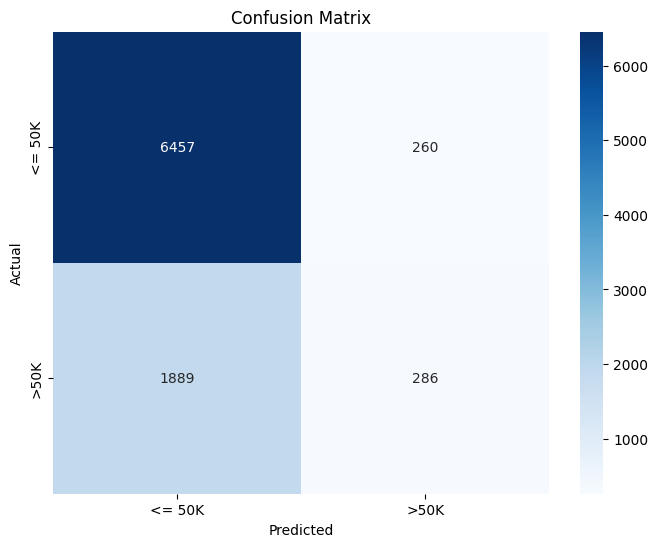

In [266]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<= 50K', '>50K'], yticklabels=['<= 50K', '>50K'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
